In [66]:
from scipy import ndimage
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import peakutils
from Compute import rolling_mean, rolling_mean_1d

In [102]:
data = pd.read_csv("Test_Weekend_24July_raw.csv", index_col=0)
data.columns = data.columns.astype(np.float)
distances = np.array(data.columns)
temperatures = np.array(data.index)

temperature_array = np.zeros((len(distances)))

<Figure size 432x288 with 0 Axes>

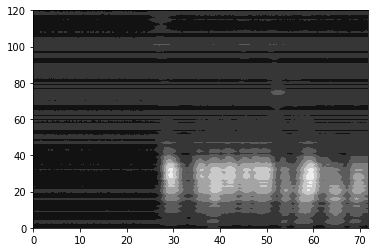

In [103]:

plt.gray()
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.contourf(distances, temperatures, data.values)

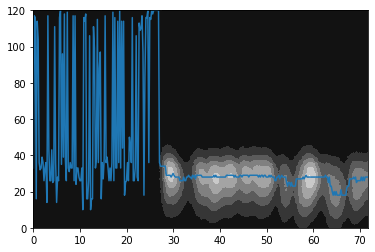

In [105]:
data_background_subtracted = data.values - np.min(data.values, axis=1)[:, None]
data_background_normalized = data_background_subtracted/data_background_subtracted.max()
temperatures_old_implementation = temperatures[np.argmax(data_background_subtracted, axis=0)]
plt.contourf(distances, temperatures, data_background_subtracted)
plt.plot(distances, temperatures_old_implementation)

(1.0, 0.24184313472360366)

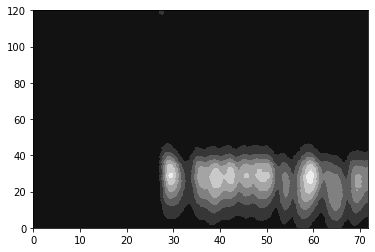

In [108]:
plt.contourf(distances, temperatures, data_background_normalized)
data_background_normalized.max(), data_background_subtracted.max()

<Figure size 432x288 with 0 Axes>

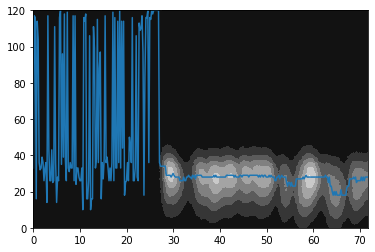

In [109]:
plt.gray()

result = ndimage.maximum_filter(data_background_subtracted, size=1)
temperatures_max_filter = temperatures[np.argmax(result, axis=0)]
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.contourf(distances, temperatures, result)
plt.plot(distances,temperatures_max_filter)


In [100]:
# using peakutils and rolling mean
n = 10
threshold = 0.1
temperature_peakutils = np.zeros((len(data.columns)))
for i in range(0, len(data.columns)):
    # print(peakutils.indexes(data_v[x,xth_datapoint], thres=noise*5, min_dist=30)[-1])
    temperature_peakutils[i] = (temperatures[peakutils.indexes(rolling_mean_1d(np.log(data_background_subtracted[:,i]),n), thres=threshold, min_dist=1)[-1]])

c:\python37\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
c:\python37\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in subtract
  import sys
c:\python37\lib\site-packages\numpy\lib\function_base.py:1269: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
c:\python37\lib\site-packages\peakutils\peak.py:87: RuntimeWarning: invalid value encountered in less
  & (np.greater(y, thres))
c:\python37\lib\site-packages\peakutils\peak.py:87: RuntimeWarning: invalid value encountered in greater
  & (np.greater(y, thres))


IndexError: index -1 is out of bounds for axis 0 with size 0

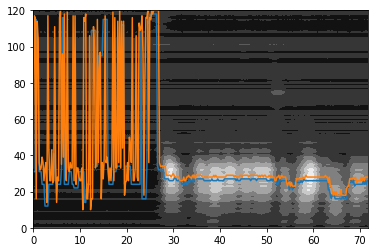

In [101]:
plt.contourf(distances, temperatures, data.values*0.1)
plt.plot(distances,temperatures_max_filter)
plt.plot(distances,temperatures_old_implementation)
plt.plot(distances,temperature_peakutils)